# Deferred After the inputs have been created

The input_df_dict dictionary contains the following information (keys)
 - billings
 - ADBE_cal
 - bookings
 - FX_forwards
 - FX_rates


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

In [2]:
input_df_dict = pickle.load(open('../data/processed/all_inputs.p', 'rb'))

df_billings = input_df_dict['billings']
df_cal = input_df_dict['ADBE_cal']
df_bookings = input_df_dict['bookings']
df_FX_fwds  = input_df_dict['FX_forwards']
df_FX_rates = input_df_dict['FX_rates']

## Cleaning up the billings data by doing the following
 - remove BUs that are not active (LiveCycle and Other Solutions)
 - add missing periods to the remaining BUs and currency combinations
 

In [3]:
def add_billings_periods(df_billings):
    # clean up billings by removing LiveCycle and other solutions
    index_lc = df_billings[df_billings['BU']=='LiveCycle'].index
    df_billings.drop(index_lc, inplace=True)

    index_other = df_billings[df_billings['BU']=='Other Solutions'].index
    df_billings.drop(index_other, inplace=True)

    
    all_BU = df_billings['BU'].unique()
    all_curr = df_billings['curr'].unique()

    all_periods = df_billings['period'].unique()
    all_periods = np.sort(all_periods)
    all_periods = all_periods[-36:]


    list_new_BUs = []
    list_new_currs = []
    list_new_periods = []

    for this_BU in all_BU:

        for this_curr in all_curr:

            df_slice = df_billings[(df_billings['BU']== this_BU)&
                                   (df_billings['curr']==this_curr)].copy()

            list_periods = df_slice['period'].unique()
            set_periods = set(list_periods)
            set_all = set(all_periods)

            periods_missing = set_all.difference(set_periods)

            for i in periods_missing:
                list_new_periods.append(i)
                list_new_currs.append(this_curr)
                list_new_BUs.append(this_BU)


    df_to_add = pd.DataFrame({'curr': list_new_currs, 
                              'BU': list_new_BUs,
                              'period': list_new_periods})

    df_billings_check = pd.concat([df_billings, df_to_add], sort=False)

    df_billings_check = df_billings_check.fillna(0)

    df_billings = df_billings_check.copy()
    
    df_billings=df_billings.sort_values(['curr', 'BU', 'period'], ascending = (True, True, True))

    return df_billings


In [4]:
df_billings = add_billings_periods(df_billings)

## We need to split the bookings information from quarters into periods
For each currency and BU, we will take the percentage of annual bookings for each period in a quarter.
This percentage will be what we use to split the bookings into periods


In [8]:
# find the last period in the billings index
last_period = '2020-03'


In [9]:
list_BUs = df_bookings['BU'].unique()
list_curr = df_bookings['Currency'].unique()

In [10]:
list_BUs

array(['Experience Cloud', 'Creative', 'Document Cloud'], dtype=object)

In [11]:
# creating dataframe of zeros

l_BU = []
l_curr = []
for BU in list_BUs:
    for curr in list_curr:
        l_BU.append(BU)
        l_curr.append(curr)
print(l_BU)
print(l_curr)
l_zero = np.arange(len(l_BU))

['Experience Cloud', 'Experience Cloud', 'Experience Cloud', 'Experience Cloud', 'Experience Cloud', 'Creative', 'Creative', 'Creative', 'Creative', 'Creative', 'Document Cloud', 'Document Cloud', 'Document Cloud', 'Document Cloud', 'Document Cloud']
['AUD', 'EUR', 'USD', 'JPY', 'GBP', 'AUD', 'EUR', 'USD', 'JPY', 'GBP', 'AUD', 'EUR', 'USD', 'JPY', 'GBP']


In [12]:
list_curr

array(['AUD', 'EUR', 'USD', 'JPY', 'GBP'], dtype=object)

In [13]:
l_zero = np.zeros(len(l_BU))
l_zero

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
data= {'BU':l_BU, 'curr':l_curr, 
      'Q1':l_zero,
      'Q2':l_zero,
      'Q3':l_zero,
      'Q4':l_zero,
      'P01':l_zero,
      'P02':l_zero,
      'P03':l_zero,
      'P04':l_zero,
      'P05':l_zero,
      'P06':l_zero,
      'P07':l_zero,
       'P08':l_zero,
       'P09':l_zero,
       'P10':l_zero,
       'P11':l_zero,
       'P12':l_zero,
      }

df_book_period=pd.DataFrame(data)

In [15]:
df_book_period

,BU,curr,Q1,Q2,Q3,Q4,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,P11,P12
0,Experience Cloud,AUD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Experience Cloud,EUR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Experience Cloud,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Experience Cloud,JPY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Experience Cloud,GBP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Creative,AUD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Creative,EUR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Creative,USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Creative,JPY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Creative,GBP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_bookings.head(10)

,BU,segment,product,geo,country,booking_type,Quarter,US_amount,Country,Currency
0,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q1 2020,-243336.527786,Aus and New Zealand,AUD
1,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q1 2020,-309237.732096,Aus and New Zealand,AUD
2,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q1 2020,-61767.378056,Aus and New Zealand,AUD
3,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q1 2020,-503969.121094,Aus and New Zealand,AUD
4,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q2 2020,-145084.185190,Aus and New Zealand,AUD
5,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q2 2020,-184376.364697,Aus and New Zealand,AUD
6,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q2 2020,-36827.474272,Aus and New Zealand,AUD
7,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q2 2020,-325745.459992,Aus and New Zealand,AUD
8,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q3 2020,-103805.125604,Aus and New Zealand,AUD
9,Experience Cloud,Marketo,Marketo,ASIA,Aus and New Zealand,Total Subscription Attrition,Q3 2020,-131917.973491,Aus and New Zealand,AUD


In [17]:
# fill in the quarters
for i in range(len(df_book_period['BU'])):
    
    this_BU = df_book_period['BU'][i]
    this_curr = df_book_period['curr'][i]
    this_slice = df_bookings[(df_bookings['BU']==this_BU)&
                          (df_bookings['Currency']==this_curr)]
    
    this_Q1= this_slice[this_slice['Quarter']=='Q1 2020']
    sum_Q1 = this_Q1['US_amount'].sum()
    df_book_period['Q1'].loc[i]=sum_Q1
    
    this_Q2= this_slice[this_slice['Quarter']=='Q2 2020']
    sum_Q2 = this_Q2['US_amount'].sum()
    df_book_period['Q2'].loc[i]=sum_Q2
    
    this_Q3= this_slice[this_slice['Quarter']=='Q4 2020']
    sum_Q3 = this_Q3['US_amount'].sum()
    df_book_period['Q3'].loc[i]=sum_Q3
    
    this_Q4= this_slice[this_slice['Quarter']=='Q4 2020']
    sum_Q4 = this_Q4['US_amount'].sum()
    df_book_period['Q4'].loc[i]=sum_Q4
    
    

/Users/davidsmith/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
df_book_period

,BU,curr,Q1,Q2,Q3,Q4,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,P11,P12
0,Experience Cloud,AUD,7.433434e+06,1.358439e+07,1.816287e+07,1.816287e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Experience Cloud,EUR,3.499845e+07,3.721689e+07,7.695415e+07,7.695415e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Experience Cloud,USD,1.247171e+08,1.986764e+08,3.135637e+08,3.135637e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Experience Cloud,JPY,1.182163e+07,2.024655e+07,2.681428e+07,2.681428e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Experience Cloud,GBP,2.157488e+07,2.645604e+07,4.759333e+07,4.759333e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Creative,AUD,1.393692e+07,1.379181e+07,2.364523e+07,2.364523e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Creative,EUR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Creative,USD,2.075290e+07,1.613099e+07,3.783942e+07,3.783942e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Creative,JPY,2.711939e+06,6.155972e+06,5.318174e+06,5.318174e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Creative,GBP,1.579663e+07,1.104858e+07,2.342099e+07,2.342099e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# list of quarters for the percentages
list_q2 = ['2019-04', '2019-05', '2019-06']
list_q3 = ['2019-07', '2019-08', '2019-09']
list_q4 = ['2019-10', '2019-11', '2019-12']
list_q1 = [ '2020-01', '2020-02', '2020-03']

list_periods = ['2020-01', '2020-02', '2020-03',
                '2019-04', '2019-05', '2019-06',
                '2019-07', '2019-08', '2019-09',
                '2019-10', '2019-11', '2019-12']
print(list_periods)
list_p_headers = ['P01', 'P02', 'P03',
                  'P04', 'P05', 'P06',
                  'P07', 'P08', 'P09',
                  'P10', 'P11', 'P12'
                 ]
list_q_headers = ['Q1', 'Q1', 'Q1',
                  'Q2', 'Q2', 'Q2',
                  'Q3', 'Q3', 'Q3',
                  'Q4', 'Q4', 'Q4']
print(list_p_headers)

['2020-01', '2020-02', '2020-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']
['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12']


In [20]:
# fill in the periods
for i in range(len(df_book_period['BU'])):
    
    this_BU = df_book_period['BU'][i]
    this_curr = df_book_period['curr'][i]
    
    this_slice = df_billings[(df_billings['BU']==this_BU)&
                          (df_billings['curr']==this_curr)]
    
    for j in range(len(list_periods)):
        this_period = list_periods[j]
        this_header = list_p_headers[j]
        this_quarter = list_q_headers[j]
        this_P_slice = this_slice[this_slice['period']==this_period]
        df_book_period.loc[[i],[this_header]]=this_P_slice['deferred_1Y_DC'].sum()
        
df_book_period['bill_Q1_sum'] = df_book_period['P01'] + df_book_period['P02'] + df_book_period['P03']    
df_book_period['bill_Q2_sum'] = df_book_period['P04'] + df_book_period['P05'] + df_book_period['P06']    
df_book_period['bill_Q3_sum'] = df_book_period['P07'] + df_book_period['P08'] + df_book_period['P09']    
df_book_period['bill_Q4_sum'] = df_book_period['P10'] + df_book_period['P11'] + df_book_period['P12']    

df_book_period['P01'] = df_book_period['Q1']*df_book_period['P01']/df_book_period['bill_Q1_sum']
df_book_period['P02'] = df_book_period['Q1']*df_book_period['P02']/df_book_period['bill_Q1_sum']
df_book_period['P03'] = df_book_period['Q1']*df_book_period['P03']/df_book_period['bill_Q1_sum']

df_book_period['P04'] = df_book_period['Q2']*df_book_period['P04']/df_book_period['bill_Q2_sum']
df_book_period['P05'] = df_book_period['Q2']*df_book_period['P05']/df_book_period['bill_Q2_sum']
df_book_period['P06'] = df_book_period['Q2']*df_book_period['P06']/df_book_period['bill_Q2_sum']

df_book_period['P07'] = df_book_period['Q3']*df_book_period['P07']/df_book_period['bill_Q3_sum']
df_book_period['P08'] = df_book_period['Q3']*df_book_period['P08']/df_book_period['bill_Q3_sum']
df_book_period['P09'] = df_book_period['Q3']*df_book_period['P09']/df_book_period['bill_Q3_sum']

df_book_period['P10'] = df_book_period['Q4']*df_book_period['P10']/df_book_period['bill_Q4_sum']
df_book_period['P11'] = df_book_period['Q4']*df_book_period['P11']/df_book_period['bill_Q4_sum']
df_book_period['P12'] = df_book_period['Q4']*df_book_period['P12']/df_book_period['bill_Q4_sum']

        

In [21]:
df_book_period.loc[0]['Q1']

7433433.702077989

In [22]:
df_book_period

,BU,curr,Q1,Q2,Q3,Q4,P01,P02,P03,P04,...,P07,P08,P09,P10,P11,P12,bill_Q1_sum,bill_Q2_sum,bill_Q3_sum,bill_Q4_sum
0,Experience Cloud,AUD,7.433434e+06,1.358439e+07,1.816287e+07,1.816287e+07,2.446926e+06,2.411696e+06,2.574812e+06,1.902455e+06,...,2.811683e+06,7.213659e+06,8.137530e+06,4.766754e+06,4.182153e+06,9.213966e+06,2.333180e+07,9.811537e+06,2.094163e+07,2.504277e+07
1,Experience Cloud,EUR,3.499845e+07,3.721689e+07,7.695415e+07,7.695415e+07,7.586985e+06,1.835026e+07,9.061199e+06,9.100126e+06,...,3.280011e+07,2.194373e+07,2.221031e+07,2.872638e+07,1.689213e+07,3.133564e+07,6.389787e+07,3.129786e+07,3.227531e+07,4.630633e+07
2,Experience Cloud,USD,1.247171e+08,1.986764e+08,3.135637e+08,3.135637e+08,4.488347e+07,4.657423e+07,3.325938e+07,4.861151e+07,...,8.742538e+07,7.658396e+07,1.495543e+08,1.049945e+08,9.468008e+07,1.138891e+08,3.555219e+08,1.412866e+08,2.118878e+08,2.349536e+08
3,Experience Cloud,JPY,1.182163e+07,2.024655e+07,2.681428e+07,2.681428e+07,4.191875e+06,4.971201e+06,2.658557e+06,7.899640e+05,...,1.008977e+07,1.120458e+07,5.519922e+06,5.585768e+06,1.139248e+07,9.836033e+06,1.446551e+09,2.967100e+09,1.280155e+09,1.099353e+09
4,Experience Cloud,GBP,2.157488e+07,2.645604e+07,4.759333e+07,4.759333e+07,5.511899e+06,6.248136e+06,9.814842e+06,1.102075e+07,...,2.166839e+07,1.497688e+07,1.094806e+07,1.556676e+07,1.121560e+07,2.081097e+07,1.886141e+07,1.375987e+07,1.558331e+07,2.506557e+07
5,Creative,AUD,1.393692e+07,1.379181e+07,2.364523e+07,2.364523e+07,4.502145e+06,3.363263e+06,6.071509e+06,3.892268e+06,...,6.937723e+06,7.857480e+06,8.850029e+06,5.861274e+06,5.146632e+06,1.263733e+07,3.256804e+07,3.351668e+07,3.974319e+07,4.712909e+07
6,Creative,EUR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.632360e+08,1.348083e+08,1.558901e+08,2.169764e+08
7,Creative,USD,2.075290e+07,1.613099e+07,3.783942e+07,3.783942e+07,7.004166e+06,5.285728e+06,8.463003e+06,4.495379e+06,...,1.041130e+07,9.500524e+06,1.792759e+07,1.064223e+07,1.080927e+07,1.638791e+07,4.939587e+08,4.483563e+08,5.794996e+08,5.868422e+08
8,Creative,JPY,2.711939e+06,6.155972e+06,5.318174e+06,5.318174e+06,7.529930e+05,6.734288e+05,1.285517e+06,1.648482e+06,...,1.427165e+06,1.766215e+06,2.124794e+06,1.646169e+06,1.148706e+06,2.523300e+06,9.671118e+09,1.286305e+10,1.101781e+10,1.018881e+10
9,Creative,GBP,1.579663e+07,1.104858e+07,2.342099e+07,2.342099e+07,5.636788e+06,4.382726e+06,5.777112e+06,3.215084e+06,...,5.618554e+06,5.051653e+06,1.275078e+07,7.468475e+06,5.897097e+06,1.005542e+07,3.179986e+07,2.861961e+07,4.507428e+07,3.930805e+07


In [23]:
df_book_period.columns

Index(['BU', 'curr', 'Q1', 'Q2', 'Q3', 'Q4', 'P01', 'P02', 'P03', 'P04', 'P05',
       'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'bill_Q1_sum',
       'bill_Q2_sum', 'bill_Q3_sum', 'bill_Q4_sum'],
      dtype='object')

In [24]:
df_book_period.drop(['bill_Q1_sum', 'bill_Q2_sum', 'bill_Q3_sum', 'bill_Q4_sum'], axis=1,inplace=True)

## Now working on converting these to local currency

In [25]:
df_FX_fwds.set_index('curr', inplace=True)

In [26]:
EUR = df_FX_fwds.loc['EUR','forward']
EUR

0.917349

In [27]:
list_fwds =[]
for i in range(len(df_book_period['curr'])):
    this_curr = df_book_period['curr'][i]
    print(this_curr)
    if this_curr == 'USD':
        this_fwd=1
    else:
        this_fwd = df_FX_fwds.loc[this_curr, 'forward']
    
    print(this_fwd)
    list_fwds.append(this_fwd)
df_book_period['FX_fwd_rate'] = list_fwds

AUD
1.49115
EUR
0.917349
USD
1
JPY
108.9682
GBP
0.766329
AUD
1.49115
EUR
0.917349
USD
1
JPY
108.9682
GBP
0.766329
AUD
1.49115
EUR
0.917349
USD
1
JPY
108.9682
GBP
0.766329


In [28]:
df_book_period

,BU,curr,Q1,Q2,Q3,Q4,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,P11,P12,FX_fwd_rate
0,Experience Cloud,AUD,7.433434e+06,1.358439e+07,1.816287e+07,1.816287e+07,2.446926e+06,2.411696e+06,2.574812e+06,1.902455e+06,4.116428e+06,7.565509e+06,2.811683e+06,7.213659e+06,8.137530e+06,4.766754e+06,4.182153e+06,9.213966e+06,1.491150
1,Experience Cloud,EUR,3.499845e+07,3.721689e+07,7.695415e+07,7.695415e+07,7.586985e+06,1.835026e+07,9.061199e+06,9.100126e+06,1.816391e+07,9.952856e+06,3.280011e+07,2.194373e+07,2.221031e+07,2.872638e+07,1.689213e+07,3.133564e+07,0.917349
2,Experience Cloud,USD,1.247171e+08,1.986764e+08,3.135637e+08,3.135637e+08,4.488347e+07,4.657423e+07,3.325938e+07,4.861151e+07,7.441966e+07,7.564527e+07,8.742538e+07,7.658396e+07,1.495543e+08,1.049945e+08,9.468008e+07,1.138891e+08,1.000000
3,Experience Cloud,JPY,1.182163e+07,2.024655e+07,2.681428e+07,2.681428e+07,4.191875e+06,4.971201e+06,2.658557e+06,7.899640e+05,1.747340e+07,1.983193e+06,1.008977e+07,1.120458e+07,5.519922e+06,5.585768e+06,1.139248e+07,9.836033e+06,108.968200
4,Experience Cloud,GBP,2.157488e+07,2.645604e+07,4.759333e+07,4.759333e+07,5.511899e+06,6.248136e+06,9.814842e+06,1.102075e+07,8.763335e+06,6.671956e+06,2.166839e+07,1.497688e+07,1.094806e+07,1.556676e+07,1.121560e+07,2.081097e+07,0.766329
5,Creative,AUD,1.393692e+07,1.379181e+07,2.364523e+07,2.364523e+07,4.502145e+06,3.363263e+06,6.071509e+06,3.892268e+06,3.451427e+06,6.448112e+06,6.937723e+06,7.857480e+06,8.850029e+06,5.861274e+06,5.146632e+06,1.263733e+07,1.491150
6,Creative,EUR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.917349
7,Creative,USD,2.075290e+07,1.613099e+07,3.783942e+07,3.783942e+07,7.004166e+06,5.285728e+06,8.463003e+06,4.495379e+06,4.273529e+06,7.362081e+06,1.041130e+07,9.500524e+06,1.792759e+07,1.064223e+07,1.080927e+07,1.638791e+07,1.000000
8,Creative,JPY,2.711939e+06,6.155972e+06,5.318174e+06,5.318174e+06,7.529930e+05,6.734288e+05,1.285517e+06,1.648482e+06,2.206511e+06,2.300979e+06,1.427165e+06,1.766215e+06,2.124794e+06,1.646169e+06,1.148706e+06,2.523300e+06,108.968200
9,Creative,GBP,1.579663e+07,1.104858e+07,2.342099e+07,2.342099e+07,5.636788e+06,4.382726e+06,5.777112e+06,3.215084e+06,3.079131e+06,4.754361e+06,5.618554e+06,5.051653e+06,1.275078e+07,7.468475e+06,5.897097e+06,1.005542e+07,0.766329


In [29]:
df_book_period['P01_DC']=df_book_period['P01']* df_book_period['FX_fwd_rate']
df_book_period['P02_DC']=df_book_period['P02']* df_book_period['FX_fwd_rate']
df_book_period['P03_DC']=df_book_period['P03']* df_book_period['FX_fwd_rate']
df_book_period['P04_DC']=df_book_period['P04']* df_book_period['FX_fwd_rate']
df_book_period['P05_DC']=df_book_period['P05']* df_book_period['FX_fwd_rate']
df_book_period['P06_DC']=df_book_period['P06']* df_book_period['FX_fwd_rate']
df_book_period['P07_DC']=df_book_period['P07']* df_book_period['FX_fwd_rate']
df_book_period['P08_DC']=df_book_period['P08']* df_book_period['FX_fwd_rate']
df_book_period['P09_DC']=df_book_period['P09']* df_book_period['FX_fwd_rate']
df_book_period['P10_DC']=df_book_period['P10']* df_book_period['FX_fwd_rate']
df_book_period['P11_DC']=df_book_period['P11']* df_book_period['FX_fwd_rate']
df_book_period['P12_DC']=df_book_period['P12']* df_book_period['FX_fwd_rate']

In [30]:
df_book_period

,BU,curr,Q1,Q2,Q3,Q4,P01,P02,P03,P04,...,P03_DC,P04_DC,P05_DC,P06_DC,P07_DC,P08_DC,P09_DC,P10_DC,P11_DC,P12_DC
0,Experience Cloud,AUD,7.433434e+06,1.358439e+07,1.816287e+07,1.816287e+07,2.446926e+06,2.411696e+06,2.574812e+06,1.902455e+06,...,3.839431e+06,2.836845e+06,6.138212e+06,1.128131e+07,4.192641e+06,1.075665e+07,1.213428e+07,7.107945e+06,6.236217e+06,1.373940e+07
1,Experience Cloud,EUR,3.499845e+07,3.721689e+07,7.695415e+07,7.695415e+07,7.586985e+06,1.835026e+07,9.061199e+06,9.100126e+06,...,8.312282e+06,8.347991e+06,1.666265e+07,9.130243e+06,3.008915e+07,2.013006e+07,2.037461e+07,2.635211e+07,1.549598e+07,2.874572e+07
2,Experience Cloud,USD,1.247171e+08,1.986764e+08,3.135637e+08,3.135637e+08,4.488347e+07,4.657423e+07,3.325938e+07,4.861151e+07,...,3.325938e+07,4.861151e+07,7.441966e+07,7.564527e+07,8.742538e+07,7.658396e+07,1.495543e+08,1.049945e+08,9.468008e+07,1.138891e+08
3,Experience Cloud,JPY,1.182163e+07,2.024655e+07,2.681428e+07,2.681428e+07,4.191875e+06,4.971201e+06,2.658557e+06,7.899640e+05,...,2.896981e+08,8.608096e+07,1.904045e+09,2.161050e+08,1.099464e+09,1.220943e+09,6.014960e+08,6.086711e+08,1.241418e+09,1.071815e+09
4,Experience Cloud,GBP,2.157488e+07,2.645604e+07,4.759333e+07,4.759333e+07,5.511899e+06,6.248136e+06,9.814842e+06,1.102075e+07,...,7.521398e+06,8.445520e+06,6.715598e+06,5.112913e+06,1.660511e+07,1.147722e+07,8.389813e+06,1.192926e+07,8.594836e+06,1.594805e+07
5,Creative,AUD,1.393692e+07,1.379181e+07,2.364523e+07,2.364523e+07,4.502145e+06,3.363263e+06,6.071509e+06,3.892268e+06,...,9.053531e+06,5.803955e+06,5.146595e+06,9.615103e+06,1.034519e+07,1.171668e+07,1.319672e+07,8.740039e+06,7.674401e+06,1.884415e+07
6,Creative,EUR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,Creative,USD,2.075290e+07,1.613099e+07,3.783942e+07,3.783942e+07,7.004166e+06,5.285728e+06,8.463003e+06,4.495379e+06,...,8.463003e+06,4.495379e+06,4.273529e+06,7.362081e+06,1.041130e+07,9.500524e+06,1.792759e+07,1.064223e+07,1.080927e+07,1.638791e+07
8,Creative,JPY,2.711939e+06,6.155972e+06,5.318174e+06,5.318174e+06,7.529930e+05,6.734288e+05,1.285517e+06,1.648482e+06,...,1.400805e+08,1.796321e+08,2.404396e+08,2.507335e+08,1.555156e+08,1.924612e+08,2.315350e+08,1.793800e+08,1.251724e+08,2.749595e+08
9,Creative,GBP,1.579663e+07,1.104858e+07,2.342099e+07,2.342099e+07,5.636788e+06,4.382726e+06,5.777112e+06,3.215084e+06,...,4.427168e+06,2.463812e+06,2.359627e+06,3.643405e+06,4.305661e+06,3.871228e+06,9.771293e+06,5.723309e+06,4.519116e+06,7.705757e+06


In [31]:
df_book_period.columns

Index(['BU', 'curr', 'Q1', 'Q2', 'Q3', 'Q4', 'P01', 'P02', 'P03', 'P04', 'P05',
       'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'FX_fwd_rate',
       'P01_DC', 'P02_DC', 'P03_DC', 'P04_DC', 'P05_DC', 'P06_DC', 'P07_DC',
       'P08_DC', 'P09_DC', 'P10_DC', 'P11_DC', 'P12_DC'],
      dtype='object')

# Ready to build the deferred forecast for existing billings to continue

In [32]:
df_billings.sample(10)


,curr,BU,period,recognized_DC,recognized_US,service_DC,service_US,deferred_B_DC,deferred_B_US,deferred_1M_DC,...,deferred_1Y_DC,deferred_2Y_DC,deferred_3Y_DC,deferred_1M_US,deferred_3M_US,deferred_6M_US,deferred_1Y_US,deferred_2Y_US,deferred_3Y_US,Period_Weeks
3688,IDR,Creative,2019-09,0.00,0.00,0.00,0.00,0.0,0.00,8.480872e+08,...,7.886118e+08,0.00,0.00,5.981710e+04,0.000000,0.0,5.577327e+04,0.00,0.00,5.0
2650,SEK,Experience Cloud,2016-09,186811.77,11872.95,1382264.75,164406.57,654296.0,77817.84,0.000000e+00,...,1.527314e+06,0.00,0.00,0.000000e+00,167665.140000,0.0,1.806424e+05,0.00,0.00,5.0
3828,SGD,Document Cloud,2019-11,0.00,0.00,0.00,0.00,0.0,0.00,2.562060e+03,...,1.131971e+04,0.00,0.00,1.861350e+03,0.000000,0.0,8.221070e+03,0.00,0.00,4.0
1783,INR,Print & Publishing,2020-01,0.00,0.00,0.00,0.00,0.0,0.00,0.000000e+00,...,0.000000e+00,0.00,0.00,0.000000e+00,0.000000,0.0,0.000000e+00,0.00,0.00,0.0
1902,PEN,Print & Publishing,2018-06,0.00,0.00,0.00,0.00,0.0,0.00,0.000000e+00,...,0.000000e+00,0.00,0.00,0.000000e+00,0.000000,0.0,0.000000e+00,0.00,0.00,0.0
2138,ILS,Print & Publishing,2017-07,0.00,0.00,0.00,0.00,0.0,0.00,0.000000e+00,...,0.000000e+00,0.00,0.00,0.000000e+00,0.000000,0.0,0.000000e+00,0.00,0.00,0.0
2888,USD,Creative,2018-01,8078884.81,8078884.81,0.00,0.00,1500.0,1500.00,1.067958e+08,...,9.029384e+07,149978.22,1439.71,1.067958e+08,35063.518667,0.0,8.915421e+07,149978.22,1439.71,4.0
784,TWD,Document Cloud,2017-10,0.00,0.00,0.00,0.00,0.0,0.00,0.000000e+00,...,0.000000e+00,0.00,0.00,0.000000e+00,0.000000,0.0,0.000000e+00,0.00,0.00,0.0
2549,INR,DX Other,2019-05,0.00,0.00,0.00,0.00,0.0,0.00,0.000000e+00,...,0.000000e+00,0.00,0.00,0.000000e+00,0.000000,0.0,0.000000e+00,0.00,0.00,0.0
718,CHF,Print & Publishing,2018-04,4997.00,5267.27,0.00,0.00,0.0,0.00,4.021000e+03,...,4.934000e+03,0.00,0.00,4.253960e+03,0.000000,0.0,5.250750e+03,0.00,0.00,4.0


## Forecasting the billings into the future
### Steps
 - create list of bill periods that is sorted for the lookup functions
 - create forecast dataframe that includes the same columns (though in document currency) for the billings
 - add the bookings forecast to this data
 - create impact on deferred (project the new waterfall from this_
 - load up accounting's version of the initial waterfall (by BU)
 - reporting

In [33]:
list_bill_periods = df_billings['period'].unique()
list_bill_periods.sort()
print(list_bill_periods)

['2015-01' '2015-02' '2015-03' '2015-04' '2015-05' '2015-06' '2015-07'
 '2015-08' '2015-09' '2015-10' '2015-11' '2015-12' '2016-01' '2016-02'
 '2016-03' '2016-04' '2016-05' '2016-06' '2016-07' '2016-08' '2016-09'
 '2016-10' '2016-11' '2016-12' '2017-01' '2017-02' '2017-03' '2017-04'
 '2017-05' '2017-06' '2017-07' '2017-08' '2017-09' '2017-10' '2017-11'
 '2017-12' '2018-01' '2018-02' '2018-03' '2018-04' '2018-05' '2018-06'
 '2018-07' '2018-08' '2018-09' '2018-10' '2018-11' '2018-12' '2019-01'
 '2019-02' '2019-03' '2019-04' '2019-05' '2019-06' '2019-07' '2019-08'
 '2019-09' '2019-10' '2019-11' '2019-12' '2020-01' '2020-02' '2020-03']


In [34]:
df_billings['curr'].unique()

array(['ARS', 'AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'COP', 'DKK', 'EUR',
       'GBP', 'HKD', 'IDR', 'ILS', 'INR', 'JPY', 'KRW', 'MXP', 'MYR',
       'NOK', 'NZD', 'PEN', 'PHP', 'RUB', 'SEK', 'SGD', 'THB', 'TRY',
       'TWD', 'USD'], dtype=object)

In [35]:
df_billings['BU'].unique()

array(['Creative', 'DX Other', 'Document Cloud', 'Experience Cloud',
       'Print & Publishing'], dtype=object)

In [36]:
v_BU = df_billings['BU'].copy()
v_curr = df_billings['curr'].copy()
v_both = v_BU + v_curr
v_unique = v_both.unique()

v_un_BU = [sub[:-3] for sub in v_unique]
v_un_curr = [sub[-3:] for sub in v_unique]

6413


In [37]:
print(len(v_unique))

145


In [57]:
v_un_BU = [sub[:-3] for sub in v_unique]
v_un_curr = [sub[-3:] for sub in v_unique]

In [58]:
print(len(v_un_BU))
print(len(v_un_curr))

145
145


In [40]:
list_future_periods = ['2020-04', '2020-05', '2020-06',
                       '2020-07', '2020-08', '2020-09',
                       '2020-10', '2020-11', '2020-12',
                       '2021-01', '2021-02', '2021-03']

In [41]:
# creating the vectors for the future billings dataframe
v_BU_2_df=[]
v_curr_2_df=[]
v_period_2_df = []

for i in range(len(v_un_BU)):
    this_BU = v_un_BU[i]
    this_curr = v_un_curr[i]
    
    for period in list_future_periods:
        v_BU_2_df.append(this_BU)
        v_curr_2_df.append(this_curr)
        v_period_2_df.append(period)

    

In [43]:
len(v_period_2_df)

1740

In [44]:
list_all_columns = df_billings.columns
list_all_columns

Index(['curr', 'BU', 'period', 'recognized_DC', 'recognized_US', 'service_DC',
       'service_US', 'deferred_B_DC', 'deferred_B_US', 'deferred_1M_DC',
       'deferred_3M_DC', 'deferred_6M_DC', 'deferred_1Y_DC', 'deferred_2Y_DC',
       'deferred_3Y_DC', 'deferred_1M_US', 'deferred_3M_US', 'deferred_6M_US',
       'deferred_1Y_US', 'deferred_2Y_US', 'deferred_3Y_US', 'Period_Weeks'],
      dtype='object')

In [45]:
list_keepers= []
for i in list_all_columns:
    
    if i[-2:]=='DC':
        print(i)
        list_keepers.append(i)

list_keepers

recognized_DC
service_DC
deferred_B_DC
deferred_1M_DC
deferred_3M_DC
deferred_6M_DC
deferred_1Y_DC
deferred_2Y_DC
deferred_3Y_DC


['recognized_DC',
 'service_DC',
 'deferred_B_DC',
 'deferred_1M_DC',
 'deferred_3M_DC',
 'deferred_6M_DC',
 'deferred_1Y_DC',
 'deferred_2Y_DC',
 'deferred_3Y_DC']

In [46]:
df_fcst = pd.DataFrame({'curr': v_curr_2_df,
                        'BU': v_BU_2_df,
                       'period': v_period_2_df})

In [47]:
for col in list_keepers:
    df_fcst[col]=0


In [48]:
df_fcst.head(5)

,curr,BU,period,recognized_DC,service_DC,deferred_B_DC,deferred_1M_DC,deferred_3M_DC,deferred_6M_DC,deferred_1Y_DC,deferred_2Y_DC,deferred_3Y_DC
0,ARS,Creative,2020-04,0,0,0,0,0,0,0,0,0
1,ARS,Creative,2020-05,0,0,0,0,0,0,0,0,0
2,ARS,Creative,2020-06,0,0,0,0,0,0,0,0,0
3,ARS,Creative,2020-07,0,0,0,0,0,0,0,0,0
4,ARS,Creative,2020-08,0,0,0,0,0,0,0,0,0


## Adding the period weeks to the df_fcst

In [49]:
df_cal_2_merge = df_cal.copy()
df_cal_2_merge.drop(['Year', 'Quarter', 'Period', 'Qtr_Ticker', 'Qtr_Start', 'Qtr_End', 'Per_Start',
                     'Per_Ticker','Per_End'], axis=1, inplace=True)

In [50]:
df_fcst = df_fcst.merge(df_cal_2_merge, how='left', left_on='period', right_on='period_match')
df_fcst.drop(['period_match'], axis=1, inplace=True)
df_fcst.head(20)

,curr,BU,period,recognized_DC,service_DC,deferred_B_DC,deferred_1M_DC,deferred_3M_DC,deferred_6M_DC,deferred_1Y_DC,deferred_2Y_DC,deferred_3Y_DC,Period_Weeks
0,ARS,Creative,2020-04,0,0,0,0,0,0,0,0,0,4
1,ARS,Creative,2020-05,0,0,0,0,0,0,0,0,0,4
2,ARS,Creative,2020-06,0,0,0,0,0,0,0,0,0,5
3,ARS,Creative,2020-07,0,0,0,0,0,0,0,0,0,4
4,ARS,Creative,2020-08,0,0,0,0,0,0,0,0,0,4
5,ARS,Creative,2020-09,0,0,0,0,0,0,0,0,0,5
6,ARS,Creative,2020-10,0,0,0,0,0,0,0,0,0,4
7,ARS,Creative,2020-11,0,0,0,0,0,0,0,0,0,4
8,ARS,Creative,2020-12,0,0,0,0,0,0,0,0,0,5
9,ARS,Creative,2021-01,0,0,0,0,0,0,0,0,0,5


In [51]:
# starting with the 3 year billings
list_future_periods

['2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03']

In [52]:
list_bill_periods

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03'], dtype=object)

In [53]:
list_bill_periods[-36]

'2017-04'

In [ ]:
#test if I get the same numbers with a vectorized approach where we do not loop through the 12 future periods
df_fcst_loop = df_fcst.copy()

In [ ]:
old_per_6M = list_bill_periods[-6:]
this_v_6M = df_slice.loc[df_slice['period'].isin(old_per_6M), 'deferred_6M_DC'].copy()
print(this_v_6M)

this_v_6M = this_v_6M.append(this_v_6M, ignore_index=True)
print(this_v_6M)

In [54]:
old_per_3M = list_bill_periods[-3:]
this_v_3M = df_slice.loc[df_slice['period'].isin(old_per_3M), 'deferred_3M_DC'].copy()
this_v_3M = this_v_3M.append(this_v_3M, ignore_index=True)
this_v_3M = this_v_3M.append(this_v_3M, ignore_index=True)
print(this_v_3M)


NameError: name 'df_slice' is not defined

In [76]:
def find_unique_curr_and_BU(df_billings):
    v_BU = df_billings['BU'].copy()
    v_curr = df_billings['curr'].copy()
    v_both = v_BU + v_curr
    v_unique = v_both.unique()

    v_un_BU = [sub[:-3] for sub in v_unique]
    v_un_curr = [sub[-3:] for sub in v_unique]

    return v_un_BU, v_un_curr

In [147]:
def create_billing_forecast(df_billings, df_fcst):

    v_un_BU, v_un_curr = find_unique_curr_and_BU(df_billings)
    
    # new Vectorized approach (sort of)
    counter = 0

    for i in range(len(v_un_BU)):
        this_BU = v_un_BU[i]
        this_curr = v_un_curr[i]


        df_slice = df_billings[(df_billings['BU']==this_BU) &
                                (df_billings['curr']== this_curr)].copy()


        old_per_3Y = list_bill_periods[-36:-24]
        old_per_2Y = list_bill_periods[-24:-12]
        old_per_1Y = list_bill_periods[-12:]
        old_per_6M = list_bill_periods[-6:]
        old_per_3M = list_bill_periods[-3:]

        # three year
        this_v_3yrs = df_slice.loc[df_slice['period'].isin(old_per_3Y), 'deferred_3Y_DC'].copy()
        if len(this_v_3yrs)!=12:
            print(this_BU, this_curr)
            print("There is a period mismatch. length of 3yrs vector = ", len(this_v_3yrs))
            print('Length of df_slice: ', len(df_slice))    
            print('This BU: {0} and this currency: {1}'.format(this_BU, this_curr))

        else:        
            df_fcst.loc[(df_fcst['BU']==this_BU)&
                            (df_fcst['curr']==this_curr),
                            'deferred_3Y_DC'] = this_v_3yrs.values

        #two years
        this_v_2yrs = df_slice.loc[df_slice['period'].isin(old_per_2Y), 'deferred_2Y_DC'].copy()
        if len(this_v_2yrs)!=12:
            print(this_BU, this_curr)
            print("There is a period mismatch. length of 2 yrs vector = ", len(this_v_2yrs))
            print('Length of df_slice: ', len(df_slice))    
            print('This BU: {0} and this currency: {1}'.format(this_BU, this_curr))
        else:
            df_fcst.loc[(df_fcst['BU']==this_BU)&
                        (df_fcst['curr']==this_curr),
                        'deferred_2Y_DC'] = this_v_2yrs.values

        # one year
        this_v_1yrs = df_slice.loc[df_slice['period'].isin(old_per_1Y), 'deferred_1Y_DC'].copy()
        if len(this_v_1yrs)!= 12:
            print(this_BU, this_curr)
            print("There is a period mismatch. length of 1 yr vector = ", len(this_v_1yrs))
            print('Length of df_slice: ', len(df_slice))    

        else:
            df_fcst.loc[(df_fcst['BU']==this_BU)&
                        (df_fcst['curr']==this_curr),
                        'deferred_1Y_DC'] = this_v_1yrs.values

        # six months (we need to append the values to repeat once)
        this_v_6M = df_slice.loc[df_slice['period'].isin(old_per_6M), 'deferred_6M_DC'].copy()
        this_v_6M = this_v_6M.append(this_v_6M, ignore_index=True)

        df_fcst.loc[(df_fcst['BU']==this_BU)&
                    (df_fcst['curr']==this_curr),
                    'deferred_6M_DC'] = this_v_6M.values

        # three months:
        this_v_3M = df_slice.loc[df_slice['period'].isin(old_per_3M), 'deferred_3M_DC'].copy()
        this_v_3M = this_v_3M.append(this_v_3M, ignore_index=True)
        this_v_3M = this_v_3M.append(this_v_3M, ignore_index=True)

        df_fcst.loc[(df_fcst['BU']==this_BU)&
                    (df_fcst['curr']==this_curr),
                    'deferred_3M_DC'] = this_v_3M.values

        # what the hell do we do with the service and recognized revenue billings?
        # RECOGNIZED REVENUE - does not go to deferred, so just take the last 12 month's worth
        this_recog = df_slice.loc[df_slice['period'].isin(old_per_1Y), 'recognized_DC'].copy()
        df_fcst.loc[(df_fcst['BU']==this_BU) &
                    (df_fcst['curr']==this_curr),
                   'recognized_DC'] = this_recog.values

        # SERVICE BASED BILLINGS - for now just use the average of whatever we used last time
        this_svc = df_slice.loc[df_slice['period'].isin(old_per_1Y), 'service_DC'].copy()
        df_fcst.loc[(df_fcst['BU']==this_BU) &
                    (df_fcst['curr']==this_curr),
                   'service_DC'] = this_svc.values

        # Type B Deferred (Service Billings)
        this_type_B = df_slice.loc[df_slice['period'].isin(old_per_1Y), 'deferred_B_DC'].copy()
        df_fcst.loc[(df_fcst['BU']==this_BU) &
                    (df_fcst['curr']==this_curr),
                   'deferred_B_DC'] = this_type_B.values
        
        # MONTHLY BILLINGS
        # here we need to call a seperate function using just the X array that is the one month billings
        this_Y= df_slice['deferred_1M_DC'].copy()
        this_Y = this_Y.to_numpy()
        period_weeks = df_slice['Period_Weeks'].copy()
        period_weeks = period_weeks.to_numpy()
        
        y =  this_Y / period_weeks
        X = np.arange(len(this_Y))
        this_model, this_score, fcst_y = build_monthly_forecast(y, X)
        this_int = model.intercept_
        this_coeff = model.coef_
        
        df_fcst.loc[(df_fcst['BU']==this_BU) &
                    (df_fcst['curr']==this_curr),
                    'deferred_1M_DC'] = this_Y
        print('For this BU: {0} and this currency {1}, we have a score of {2}, and int of {3} and a coeff of {4}'.
             format(this_BU, this_curr, this_score, this_int, this_coeff))
        #NOTE: We will need to return two things here
        # First - the df_fcst dataframe
        # second - a dictionary describing the monthly forecasts
    
    
    return df_fcst
    



In [184]:
def build_monthly_forecast(y, X):
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    print("Model Score :", model.score(X,y))
    print("Model intercept :",model.intercept_)
    print("Model Coefficient :", model.coef_)
    score = model.score(X,y)
    
    # create the new X variables
    new_X = np.arange(np.max(X)+1, np.max(X)+12)
    new_X = new_X.reshape(-1,1)
    
    print("New X for predictions: ",new_X)
    fcst_y = model.predict(new_X)
    return model, score, fcst_y, new_X

In [110]:
y = np.array([1.1, 2.4,  4.9, 7.8, 10.3, 13.4, 13.2, 15.8, 17, 24])

X = np.arange(0, len(y))

print(y)
print(X)


[ 1.1  2.4  4.9  7.8 10.3 13.4 13.2 15.8 17.  24. ]
[0 1 2 3 4 5 6 7 8 9]


In [185]:
this_BU = 'Creative'
this_curr = 'USD'
this_slice = df_billings[(df_billings['BU']==this_BU) &
                         (df_billings['curr']==this_curr)].copy()


In [186]:
this_Y= this_slice['deferred_1M_DC'].copy()
this_Y = this_Y.to_numpy()
period_weeks = df_slice['Period_Weeks'].copy()
period_weeks = period_weeks.to_numpy()
        
y =  this_Y / period_weeks
X = np.arange(len(this_Y))
    


In [188]:
y

array([ 8826502.97041667,  9050037.87854478,  9873569.15343662,
       10282748.21826087, 10180579.43133929, 10850815.7970625 ,
       11170091.4102027 , 11769496.4340625 , 12017352.5545098 ,
       12360632.0975641 , 13428786.0544898 , 13725760.67508333,
       14371476.6634    , 14592171.23108696, 16146915.96289796,
       15739157.76782051, 16869712.49358108, 17005821.753375  ,
       17878342.75830882, 17577710.54425675, 18377198.11955102,
       19385924.34390244, 19539639.26935606, 20405891.75088524,
       20082955.58568182, 21025009.42153572, 23265823.94071642,
       21949926.00590517, 23437446.65026786, 23270249.15572308,
       24340257.3733173 , 24357552.88247024, 24337703.75846154,
       26121015.04269231, 26239512.62294812, 27090916.11210071,
       26698958.35972222, 27708198.57723118, 30422302.88292424,
       28734327.12525   , 29816666.21826087, 30475777.87258666,
       31286242.21153061, 31125213.23616279, 31037071.6132    ,
       33159263.89403409, 33071065.50744

In [191]:
this_model, this_score, fcst_y, new_X = build_monthly_forecast(y, X)
this_int = model.intercept_
this_coeff = model.coef_

Model Score : 0.9945066040394037
Model intercept : [7614454.5170576]
Model Coefficient : [[562848.47403992]]
New X for predictions:  [[63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]]


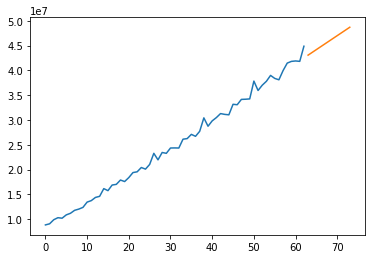

In [192]:
plt.plot(X,y, new_X, fcst_y)

In [164]:
print(this_int)

[0.56909091]


In [165]:
print(this_coeff)

[[2.31575758]]


In [173]:
this_slice.head(65)

,curr,BU,period,recognized_DC,recognized_US,service_DC,service_US,deferred_B_DC,deferred_B_US,deferred_1M_DC,...,deferred_1Y_DC,deferred_2Y_DC,deferred_3Y_DC,deferred_1M_US,deferred_3M_US,deferred_6M_US,deferred_1Y_US,deferred_2Y_US,deferred_3Y_US,Period_Weeks
2852,USD,Creative,2015-01,14559163.16,14559163.16,10000.00,10000.00,1500.0,1500.0,3.530601e+07,...,3.025592e+07,113022.580000,0.00,3.530601e+07,5.419696e+05,61250.000000,2.994515e+07,113022.580000,0.00,4.0
2853,USD,Creative,2015-02,8046578.41,8046578.41,4650.00,4650.00,22500.0,22500.0,3.620015e+07,...,3.183496e+07,73599.907073,5400.00,3.620015e+07,3.570005e+05,176250.000000,3.115471e+07,73599.907073,5400.00,4.0
2854,USD,Creative,2015-03,39811644.45,39811644.45,413507.83,413507.83,28600.0,28600.0,4.936785e+07,...,6.893778e+07,194153.634545,80563.60,4.936785e+07,6.887135e+05,136875.196667,6.839394e+07,194153.634545,80563.60,5.0
2855,USD,Creative,2015-04,9526500.08,9526500.08,7193.13,7193.13,123000.0,123000.0,4.113099e+07,...,3.646002e+07,48730.570417,0.00,4.113099e+07,3.933293e+05,150000.000000,3.603506e+07,48730.570417,0.00,4.0
2856,USD,Creative,2015-05,6109074.10,6109074.10,320.16,320.16,3000.0,3000.0,4.072232e+07,...,4.144004e+07,64170.036154,332258.00,4.072232e+07,4.005164e+05,26812.500000,4.111867e+07,64170.036154,332258.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,USD,Creative,2019-11,10971614.81,10971614.81,0.00,0.00,0.0,0.0,1.658802e+08,...,1.676384e+08,154814.540000,4029.10,1.658802e+08,0.000000e+00,-53917.220000,1.672104e+08,154814.540000,4029.10,4.0
2911,USD,Creative,2019-12,7277592.46,7277592.46,101354.82,101354.82,3620.0,3620.0,2.090775e+08,...,2.541561e+08,50884.420000,4173.68,2.090775e+08,2.351901e+06,111335.970000,2.535683e+08,50884.420000,4173.68,5.0
2912,USD,Creative,2020-01,2563316.78,2563316.78,0.00,0.00,0.0,0.0,1.676044e+08,...,1.667126e+08,153011.760000,5757.10,1.676044e+08,0.000000e+00,943829.170000,1.661866e+08,153011.760000,5757.10,4.0
2913,USD,Creative,2020-02,4960269.69,4960269.69,0.00,0.00,0.0,0.0,1.672857e+08,...,1.258105e+08,19546.180000,5469.39,1.672857e+08,1.631097e+07,446798.770000,1.251179e+08,19546.180000,5469.39,4.0


In [126]:
model, score, fcst_y = build_monthly_forecast(y, X)

0.9648379668224876
[0.56909091]
[[2.31575758]]
[[10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [148]:
df_fcst = create_billing_forecast(df_billings, df_fcst)

/Users/davidsmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [70]:
test_output = df_fcst[(df_fcst['curr']=='USD')&
                     (df_fcst['BU']=='Creative')]
test_output.head(20

,curr,BU,period,recognized_DC,service_DC,deferred_B_DC,deferred_1M_DC,deferred_3M_DC,deferred_6M_DC,deferred_1Y_DC,deferred_2Y_DC,deferred_3Y_DC,Period_Weeks
1680,USD,Creative,2020-04,6029601.76,0.00,0.0,0,0.00,162435.65,1.249478e+08,125825.180,315.00,4
1681,USD,Creative,2020-05,12002267.43,0.00,0.0,0,16310965.40,-53917.22,1.187815e+08,10964.700,0.00,4
1682,USD,Creative,2020-06,5227647.73,0.00,4900.0,0,2757448.27,111335.97,2.046270e+08,168677.200,0.00,5
1683,USD,Creative,2020-07,6245943.04,0.00,0.0,0,0.00,943829.17,1.594461e+08,90946.780,0.00,4
1684,USD,Creative,2020-08,4631076.33,0.00,0.0,0,16310965.40,446798.77,1.454977e+08,11447.700,0.00,4
1685,USD,Creative,2020-09,5831473.81,90117.82,1920.0,0,2757448.27,184841.17,2.745558e+08,174145.565,0.00,5
1686,USD,Creative,2020-10,2666328.57,0.00,0.0,0,0.00,162435.65,1.650478e+08,46735.200,19141.85,4
1687,USD,Creative,2020-11,10971614.81,0.00,0.0,0,16310965.40,-53917.22,1.676384e+08,30987.720,31517.15,4
1688,USD,Creative,2020-12,7277592.46,101354.82,3620.0,0,2757448.27,111335.97,2.541561e+08,126984.800,21173.93,5
1689,USD,Creative,2021-01,2563316.78,0.00,0.0,0,0.00,943829.17,1.667126e+08,168490.860,1439.71,5


In [ ]:
test_bill = df_billings[(df_billings['curr']=='USD') &
                        (df_billings['BU']=='Creative')]
test_bill.head(63)

## Now working on the monthly model

In [141]:
df_billings.columns

Index(['curr', 'BU', 'period', 'recognized_DC', 'recognized_US', 'service_DC',
       'service_US', 'deferred_B_DC', 'deferred_B_US', 'deferred_1M_DC',
       'deferred_3M_DC', 'deferred_6M_DC', 'deferred_1Y_DC', 'deferred_2Y_DC',
       'deferred_3Y_DC', 'deferred_1M_US', 'deferred_3M_US', 'deferred_6M_US',
       'deferred_1Y_US', 'deferred_2Y_US', 'deferred_3Y_US', 'Period_Weeks'],
      dtype='object')